# ミューチュアルインフォメーションを計算する

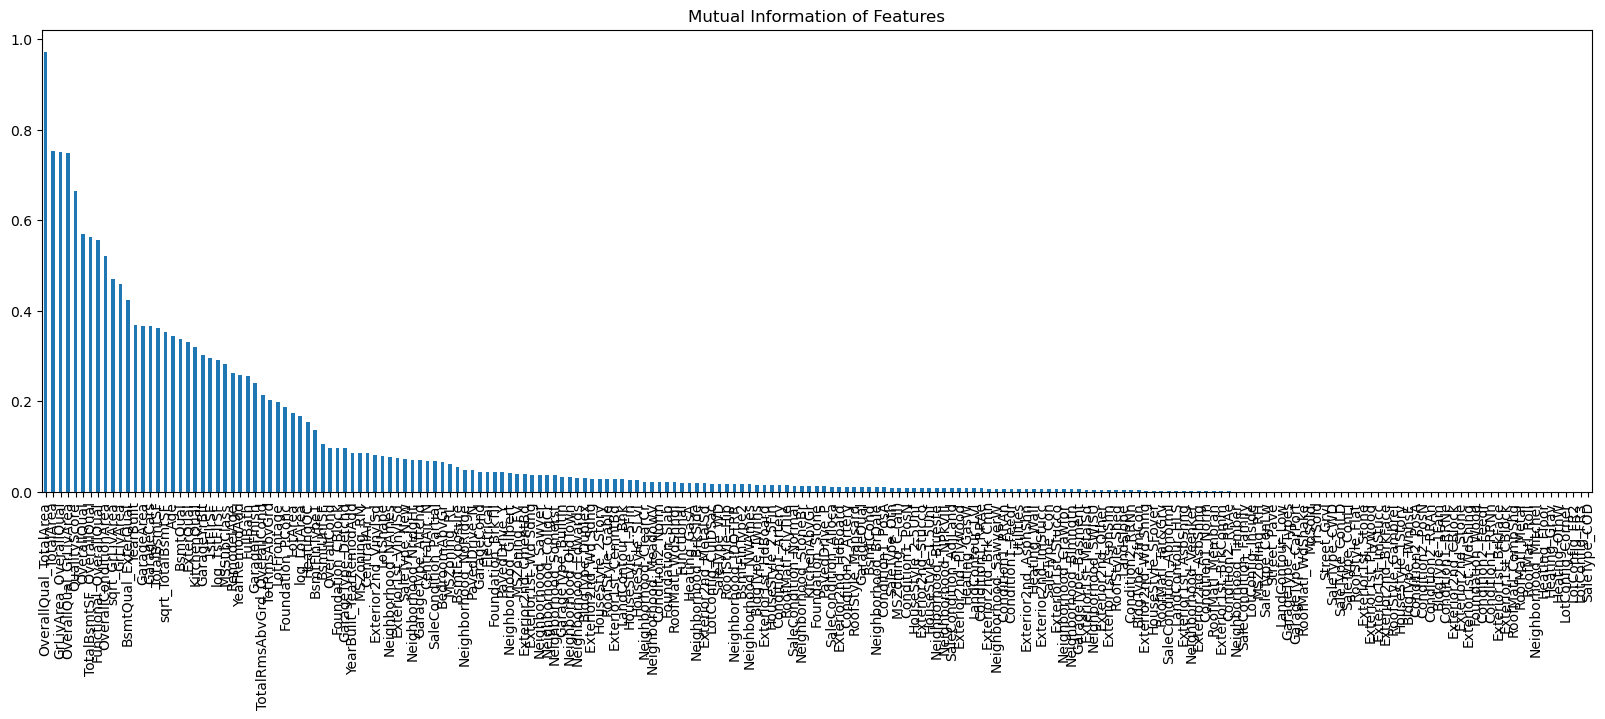

Selected top 30% features after removing duplicates: ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GrLivArea_OverallQual', 'TotalBsmtSF_OverallQual', 'YearBuilt_YearRemodAdd', 'TotalArea', 'QualityScore', 'Age', 'RemodelAge', 'OverallConditionArea', 'TotalRmsAbvGrd_OverallCond', 'Functional_OverallQual', 'log_LotArea', 'sqrt_GrLivArea', 'OverallQual_GrLivArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 'OverallQual_TotalArea', 'BsmtQual_ExterQual', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_CollgCr', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_2Story', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc',

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
data = pd.read_csv(data_path)

# 無限値をNaNに置き換え
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN値を中央値で補完
for column in data.columns:
    if data[column].isnull().any():
        data[column].fillna(data[column].median(), inplace=True)

# IDカラムのドロップ
data.drop(columns=['Id'], inplace=True, errors='ignore')

# 特徴量とターゲットの分離
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# ミューチュアルインフォメーションを計算
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# ミューチュアルインフォメーションの可視化
plt.figure(figsize=(20, 6))
mi_series.plot.bar()
plt.title('Mutual Information of Features')
plt.show()

# 上位30%の特徴量を選択
selector = SelectPercentile(mutual_info_regression, percentile=30)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# 選択された特徴量の重複削除
selected_features = pd.Series(selected_features).drop_duplicates().tolist()

print("Selected top 30% features after removing duplicates:", selected_features)

# 選択された特徴量を使用してデータをフィルタリング
X_selected = X[selected_features].copy()
# SalePriceをX_selectedに追加
selected_data = pd.concat([X_selected, y], axis=1)

# データの保存
selected_features_path = '/Users/hayakawakazue/Downloads/house_price/train/selected_train_data.csv'
selected_data.to_csv(selected_features_path, index=False)
print(f"Selected features data saved to {selected_features_path}")

# 　plotlyで相関関係を確認する

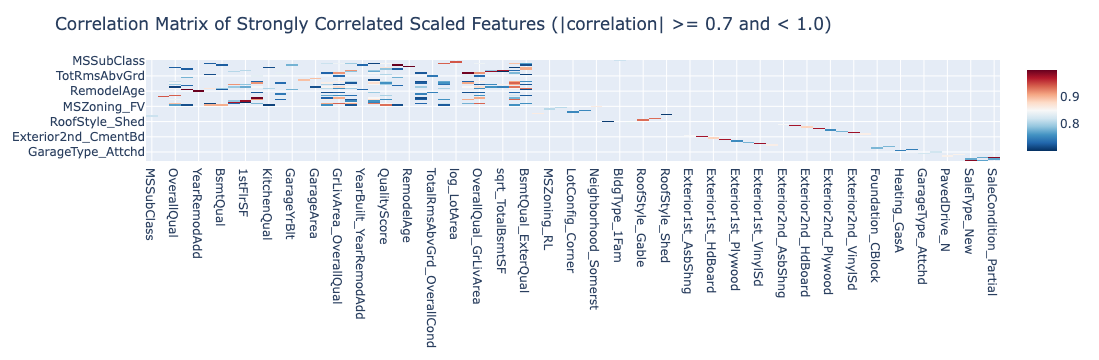

In [4]:
import plotly.express as px
import pandas as pd

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
X_scaled_df = pd.read_csv(data_path)

# 相関行列の計算
corr_matrix = X_scaled_df.corr().abs()

# 相関が0.7以上のペアをフィルタリング
high_corr = corr_matrix[(corr_matrix >= 0.7) & (corr_matrix < 1.0)]
filtered_corr_matrix = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# 相関行列のプロット
fig = px.imshow(filtered_corr_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title='Correlation Matrix of Strongly Correlated Scaled Features (|correlation| >= 0.7 and < 1.0)')
fig.show()


# 相関行列を確認する

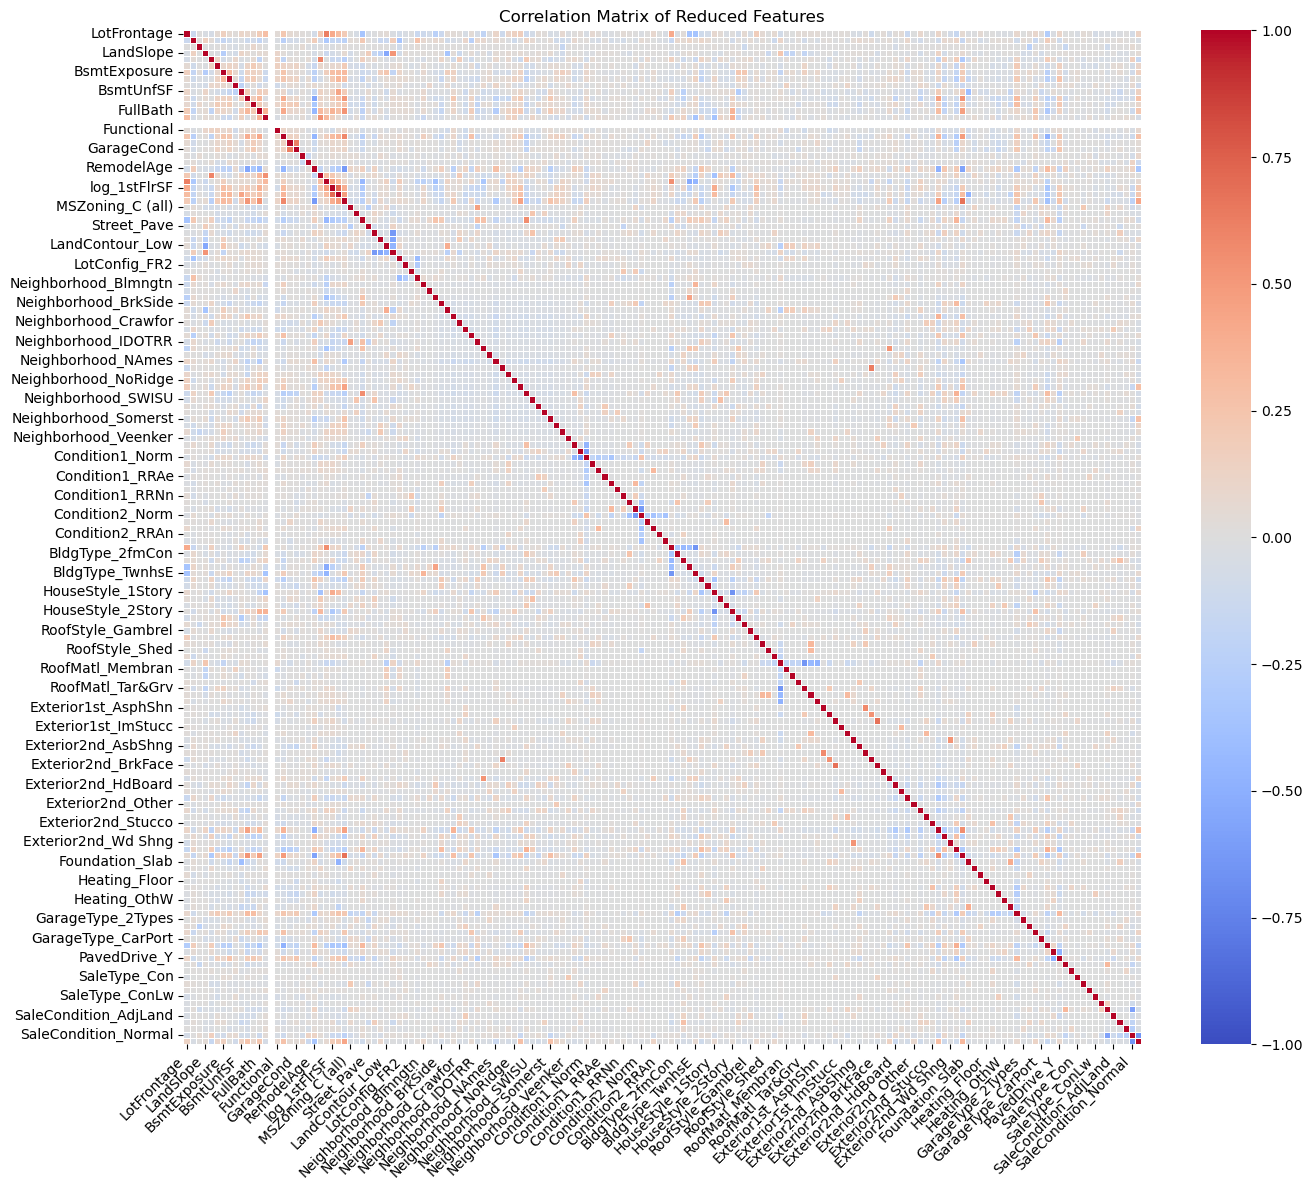

Removed features: {'GarageType_Attchd', 'Exterior1st_MetalSd', 'OverallConditionArea', 'Heating_GasA', 'TotRmsAbvGrd', 'Exterior1st_Stucco', 'RoofStyle_Flat', 'TotalBsmtSF', 'RoofStyle_Gable', 'Age', 'GarageArea', 'YearBuilt', 'QualityScore', 'Exterior1st_Wd Sdng', 'MSSubClass', 'sqrt_GrLivArea', 'Street_Grvl', 'SaleType_WD', 'OverallQual_TotalArea', 'Exterior1st_CemntBd', 'GrLivArea', 'Functional_OverallQual', 'PavedDrive_N', 'Condition2_RRAe', 'ExterQual', 'GarageCars', 'Exterior1st_AsbShng', 'Exterior1st_CBlock', 'LotArea', 'YearBuilt_YearRemodAdd', 'GrLivArea_OverallQual', 'MSZoning_FV', 'MSZoning_RL', 'OverallQual_GrLivArea', 'Exterior1st_Plywood', 'SaleType_New', 'GarageYrBlt', 'SalePrice', 'TotalBsmtSF_OverallQual', 'OverallQual', 'CentralAir_N', 'LotConfig_Corner', 'Foundation_CBlock', 'Exterior1st_HdBoard', '1stFlrSF', 'YearRemodAdd', 'KitchenQual', 'Exterior1st_VinylSd', 'TotalArea', 'BsmtQual'}


In [6]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
data = pd.read_csv(data_path)

# 相関行列の計算
corr_matrix = data.corr().abs()

# 相関が0.7以上のペアを抽出
high_corr_var = np.where(corr_matrix >= 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 削除する特徴量リストを作成
to_drop = set()
for var1, var2 in high_corr_var:
    to_drop.add(var1)  # または to_drop.add(var2)

# 特徴量を削除
data_reduced = data.drop(columns=to_drop)

# 削除した後のデータの相関行列をプロット
import seaborn as sns
import matplotlib.pyplot as plt

reduced_corr_matrix = data_reduced.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(reduced_corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Reduced Features')
plt.tight_layout()
plt.show()

# 削除された特徴量リスト
print("Removed features:", to_drop)


# 相関が0.7以上のペアを抽出し保存する

In [10]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_encoded.csv'
data = pd.read_csv(data_path)

# 目的変数の分離
target_column = 'SalePrice'  # 目的変数の名前を指定
y = data[target_column]
X = data.drop(columns=[target_column])

# 相関行列の計算
corr_matrix = X.corr().abs()

# 相関が0.7以上のペアを抽出
high_corr_var = np.where(corr_matrix >= 0.7)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# 削除する特徴量リストを作成
to_drop = set()
for var1, var2 in high_corr_var:
    to_drop.add(var1)  # または to_drop.add(var2)

# 特徴量を削除
X_reduced = X.drop(columns=to_drop)

# 目的変数を再度追加
data_reduced = pd.concat([X_reduced, y], axis=1)

# データをCSVファイルとして保存
reduced_data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_reduced.csv'
data_reduced.to_csv(reduced_data_path, index=False)

# 保存された特徴量リストを表示
remaining_features = data_reduced.columns.tolist()
print("Remaining features:", remaining_features)
print(f"Reduced data saved to {reduced_data_path}")



Remaining features: ['LotFrontage', 'LotShape', 'Utilities', 'LandSlope', 'OverallCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'Electrical', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'MoSold', 'YrSold', 'RemodelAge', 'TotalRmsAbvGrd_OverallCond', 'log_LotArea', 'log_1stFlrSF', 'sqrt_TotalBsmtSF', 'BsmtQual_ExterQual', 'MSZoning_C (all)', 'MSZoning_RH', 'MSZoning_RM', 'Street_Pave', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', '

# スケーリングを行う

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_reduced.csv'
data = pd.read_csv(data_path)

# 目的変数の分離
target_column = 'SalePrice'  # 目的変数の名前を指定
y = data[target_column]
X = data.drop(columns=[target_column])

# スケーラーの初期化と適用
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# スケーリングされた特徴量をDataFrameに変換
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 目的変数を再結合
X_scaled_df[target_column] = y.values

# 結果のデータフレームの保存
scaled_data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
X_scaled_df.to_csv(scaled_data_path, index=False)

# スケーラーの保存
scaler_path = '/Users/hayakawakazue/Downloads/house_price/model/scaler.joblib'
joblib.dump(scaler, scaler_path)

print(f"Scaled and filtered data saved to {scaled_data_path}")
print(f"Scaler saved to {scaler_path}")

print(X_scaled_df.dtypes)


Scaled and filtered data saved to /Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv
Scaler saved to /Users/hayakawakazue/Downloads/house_price/model/scaler.joblib
LotFrontage              float64
LotShape                 float64
Utilities                float64
LandSlope                float64
OverallCond              float64
                          ...   
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
SalePrice                float64
Length: 159, dtype: object
